In [1]:
pip install -q tensorflow tensorflow-datasets

## All necessary libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
tfds.disable_progress_bar()

## Dataset

In [3]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

## Get informationo on the Data

In [4]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

## Prepare Rock, Paper, Scissors Data

In [5]:
ds_train = tfds.load(name="rock_paper_scissors", split="train")
ds_test = tfds.load(name="rock_paper_scissors", split="test")

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteOP3H7Q/rock_paper_scissors-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteOP3H7Q/rock_paper_scissors-test.tfrecord
Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


## Show Examples

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


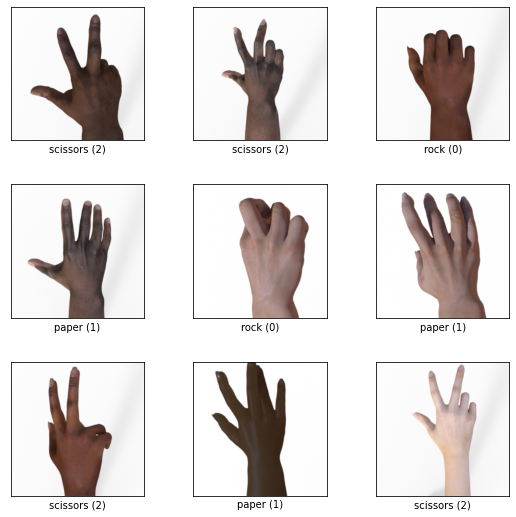

In [6]:
fig = tfds.show_examples(info, ds_train)

## Additional Data Prep

In [7]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [8]:
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

## Train a network (basic approach)

In [9]:
model = keras.Sequential([
  keras.layers.Flatten(),                          
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(3, activation='softmax')                          
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 4s 28ms/step - loss: 19.4895 - accuracy: 0.4048
Epoch 2/5
79/79 [==============================] - 2s 27ms/step - loss: 2.1685 - accuracy: 0.6226
Epoch 3/5
79/79 [==============================] - 2s 27ms/step - loss: 0.8333 - accuracy: 0.7179
Epoch 4/5
79/79 [==============================] - 2s 27ms/step - loss: 0.4196 - accuracy: 0.8401
Epoch 5/5
79/79 [==============================] - 2s 27ms/step - loss: 0.5242 - accuracy: 0.8119


In [10]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 13ms/step - loss: 1.6489 - accuracy: 0.4731


[1.648940920829773, 0.47311827540397644]

## Training a network (using a Convolutional Neural Network)

In [11]:
model = keras.Sequential([
  keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300, 300, 1)),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(3, activation='softmax')                          
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 35s 339ms/step - loss: 4.6191 - accuracy: 0.5980
Epoch 2/5
79/79 [==============================] - 25s 315ms/step - loss: 0.3104 - accuracy: 0.9107
Epoch 3/5
79/79 [==============================] - 25s 315ms/step - loss: 0.0718 - accuracy: 0.9865
Epoch 4/5
79/79 [==============================] - 25s 315ms/step - loss: 0.0290 - accuracy: 0.9968
Epoch 5/5
79/79 [==============================] - 25s 316ms/step - loss: 0.0177 - accuracy: 0.9972


In [12]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 3s 232ms/step - loss: 1.3002 - accuracy: 0.5161


[1.3002339601516724, 0.5161290168762207]

## A Better Convolutional Network

In [21]:
model = keras.Sequential([
  keras.layers.AveragePooling2D(6, 3, input_shape=(300, 300, 1)),                          
  keras.layers.Conv2D(64, 3, activation='relu'),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPool2D(2, 2),
  keras.layers.Dropout(0.5),
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(3, activation='softmax')                          
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 6s 64ms/step - loss: 0.5616 - accuracy: 0.8107
Epoch 2/5
79/79 [==============================] - 5s 62ms/step - loss: 0.0368 - accuracy: 0.9893
Epoch 3/5
79/79 [==============================] - 5s 62ms/step - loss: 0.0109 - accuracy: 0.9972
Epoch 4/5
79/79 [==============================] - 5s 62ms/step - loss: 0.0227 - accuracy: 0.9956
Epoch 5/5
79/79 [==============================] - 5s 62ms/step - loss: 0.0114 - accuracy: 0.9968


In [22]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 31ms/step - loss: 1.8675 - accuracy: 0.6774


[1.8675241470336914, 0.6774193644523621]

## Hyperparameter Tuning

In [23]:
pip install -U keras-tuner

     |████████████████████████████████| 98 kB 3.5 MB/s 


In [25]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
  model = keras.Sequential()

  model.add(keras.layers.AveragePooling2D(6, 3, input_shape=(300,300,1)))

  model.add(keras.layers.Conv2D(64, 3, activation='relu'))
  model.add(keras.layers.Conv2D(32, 3, activation='relu'))

  model.add(keras.layers.MaxPool2D(2, 2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation='relu'))

  model.add(keras.layers.Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
  
  return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
)

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

Trial 5 Complete [00h 00m 47s]
val_accuracy: 0.6935483813285828

Best val_accuracy So Far: 0.7715053558349609
Total elapsed time: 00h 04m 58s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [26]:
best_model = tuner.get_best_models()[0]

In [27]:
best_model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 31ms/step - loss: 1.9409 - accuracy: 0.7715


[1.940935492515564, 0.7715053558349609]

In [28]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d (AverageP  (None, 99, 99, 1)        0         
 ooling2D)                                                       
                                                                 
 conv2d (Conv2D)             (None, 97, 97, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 47, 32)        0         
                                                                 
 flatten (Flatten)           (None, 70688)             0

In [32]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
Dense layer: 1024
Score: 0.7715053558349609
Trial summary
Hyperparameters:
Dense layer: 512
Score: 0.7634408473968506
Trial summary
Hyperparameters:
Dense layer: 128
Score: 0.7069892287254333
Trial summary
Hyperparameters:
Dense layer: 256
Score: 0.6935483813285828
Trial summary
Hyperparameters:
Dense layer: 64
Score: 0.6666666865348816


## Save & Load our Models

In [33]:
best_model.save('./my_model')

INFO:tensorflow:Assets written to: ./my_model/assets


INFO:tensorflow:Assets written to: ./my_model/assets


In [34]:
loaded_model = keras.models.load_model('./my_model')

In [35]:
loaded_model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 31ms/step - loss: 1.9409 - accuracy: 0.7715


[1.940935492515564, 0.7715053558349609]

## Plot Image from Numpy.Array

(300, 300, 3)

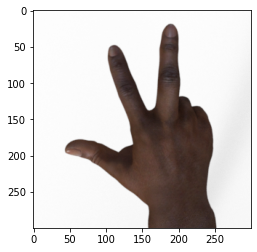

In [40]:
rgb_images = np.array([example['image'].numpy() for example in ds_train.take(1)])
rgb_image = rgb_images[0]

image = train_images[0].reshape(300, 300)

plt.imshow(rgb_image)
rgb_image.shape

## Convert PNG/JPG images to Numpy Format

(225, 225, 3)


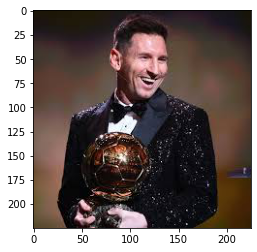

In [44]:
import imageio

im = imageio.imread('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTkeApewSoS89K7sbboKRyyHGzD8PbriRe8Vw&usqp=CAU')

plt.imshow(im)

im_np = np.asarray(im)

print(im_np.shape)

## Downloading saved model

In [46]:
!zip -r model.zip my_model/

  adding: my_model/ (stored 0%)
  adding: my_model/assets/ (stored 0%)
  adding: my_model/variables/ (stored 0%)
  adding: my_model/variables/variables.data-00000-of-00001 (deflated 38%)
  adding: my_model/variables/variables.index (deflated 64%)
  adding: my_model/keras_metadata.pb (deflated 90%)
  adding: my_model/saved_model.pb (deflated 88%)


In [47]:
from google.colab import files
files.download("model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>